# Smart Agric: Water Usage Optimization Using CNN

## Overview
This notebook demonstrates a Convolutional Neural Network (CNN) model designed for optimizing irrigation systems. By analyzing sensor data, the model predicts water usage requirements to ensure efficient resource management in agriculture. The aim is to enhance crop yield while minimizing water waste, contributing to sustainable farming practices.

---

### Developed By:
- **Daqch Rima**
- **Hiba Echchaiaa**
- **Salma Moutia**
- **Zineb Alami Arroussi**

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [7]:
import pandas as pd
# Charger le fichier pour inspecter son contenu
file_path = 'data.csv'
data = pd.read_csv(file_path)

In [25]:
# Étape 1 : Préparation des données
def augment_with_noise(data, noise_level=0.01):
    """
    Ajoute du bruit gaussien pour augmenter les données.
    :param data: Données tabulaires ou 1D.
    :param noise_level: Niveau du bruit.
    :return: Données augmentées.
    """
    noise = noise_level * np.random.randn(*data.shape)
    return data + noise

In [9]:
# Encodage de la variable catégorique 'crop'
encoder = OneHotEncoder()
crop_encoded = encoder.fit_transform(data[['crop']]).toarray()

# Normalisation des colonnes numériques
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data[['moisture', 'temp']])

# Combinaison des données encodées et normalisées
X = np.hstack([scaled_features, crop_encoded])
X = X.reshape((X.shape[0], X.shape[1], 1))  # Reshape pour le CNN

In [11]:
# La cible : 'pump'
y = data['pump'].values

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Augmenter les données avec du bruit
X_train_augmented = augment_with_noise(X_train)

# Combiner les données originales et augmentées
X_train_combined = np.vstack([X_train, X_train_augmented])
y_train_combined = np.hstack([y_train, y_train])

# Encodage des étiquettes pour la classification binaire
y_train_combined_cat = to_categorical(y_train_combined, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)


In [13]:
# Étape 2 : Construction du modèle CNN
model = Sequential([
    Conv1D(filters=16, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')  # 2 classes
])

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Étape 3 : Compilation du modèle
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [17]:
# Étape 4 : Entraînement du modèle
history = model.fit(X_train_combined, y_train_combined_cat,
                    validation_data=(X_test, y_test_cat),
                    epochs=20,
                    batch_size=16,
                    verbose=1)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.7648 - loss: 0.5490 - val_accuracy: 0.7750 - val_loss: 0.4777
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7592 - loss: 0.4835 - val_accuracy: 0.7750 - val_loss: 0.4462
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6989 - loss: 0.5040 - val_accuracy: 0.7750 - val_loss: 0.4148
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7525 - loss: 0.4359 - val_accuracy: 0.7750 - val_loss: 0.3782
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7829 - loss: 0.3727 - val_accuracy: 0.7750 - val_loss: 0.3429
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8408 - loss: 0.3442 - val_accuracy: 0.8500 - val_loss: 0.3065
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9256 - loss: 0.2449 - val_accuracy: 0.8500 - val_loss: 0.2803
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9122 - loss: 0.2551 - val_accuracy: 0.9000 - v

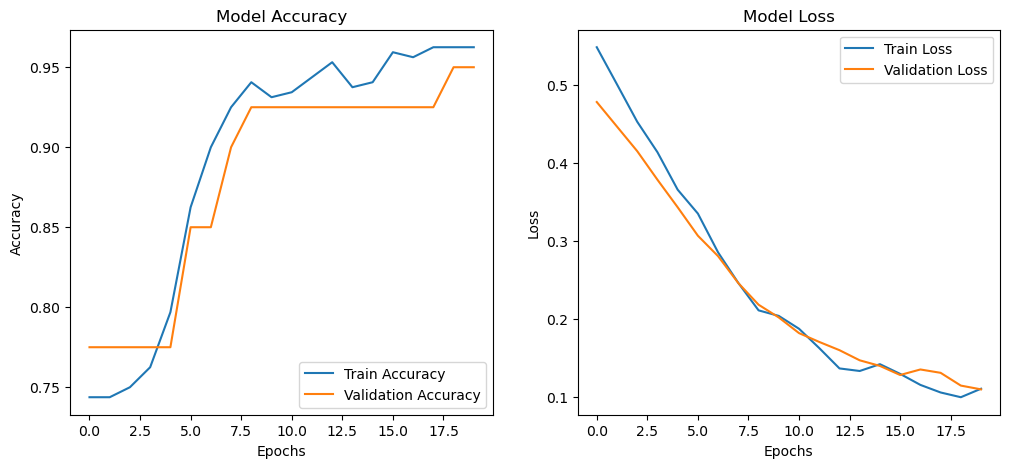

In [19]:
# Étape 5 : Visualisation des courbes
plt.figure(figsize=(12, 5))

# Courbes de précision
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Courbes de perte
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [21]:
# Étape 6 : Évaluation du modèle
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Étape 7 : Sauvegarde du modèle
model.save('cnn_irrigation_model_with_augmentation.h5')
print("Modèle sauvegardé sous le nom cnn_irrigation_model_with_augmentation.h5")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9563 - loss: 0.1030


Test Loss: 0.10980572551488876
Test Accuracy: 0.949999988079071
Modèle sauvegardé sous le nom cnn_irrigation_model_with_augmentation.h5
